In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


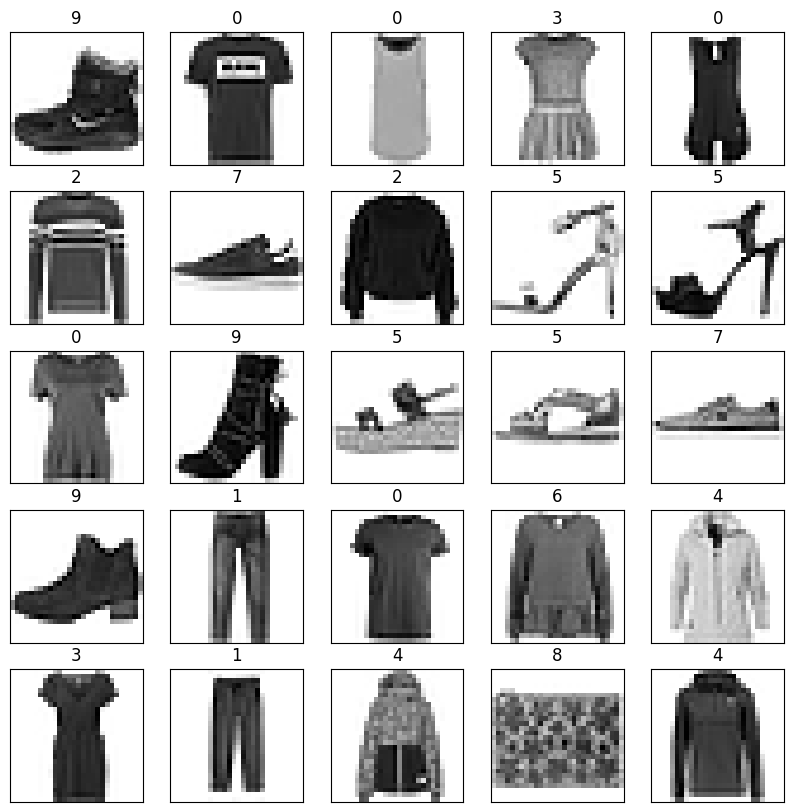

In [2]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Display some images from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(y_train[i])
plt.show()

In [3]:
# Preprocessing: Normalize and reshape the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)  # (num_samples, height, width, channels)
x_test = x_test.reshape(-1, 28, 28, 1)

In [4]:
# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax') # 10 output classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7041 - loss: 0.8045 - val_accuracy: 0.8579 - val_loss: 0.3805
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.8484 - loss: 0.4163 - val_accuracy: 0.8748 - val_loss: 0.3343
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.8755 - loss: 0.3502 - val_accuracy: 0.8922 - val_loss: 0.2919
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - accuracy: 0.8871 - loss: 0.3083 - val_accuracy: 0.9002 - val_loss: 0.2741
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.8962 - loss: 0.2821 - val_accuracy: 0.9038 - val_loss: 0.2626
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.9043 - loss: 0.2601 - val_accuracy: 0.9042 - val_loss: 0.2613
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9068 - loss: 0.2514 - val_accuracy: 0.9097 - val_loss: 0.2555
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9147 -

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

# Make some predictions
predictions = model.predict(x_test)

# Plot some predicted images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9102 - loss: 0.2558

Test accuracy: 0.9078999757766724
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


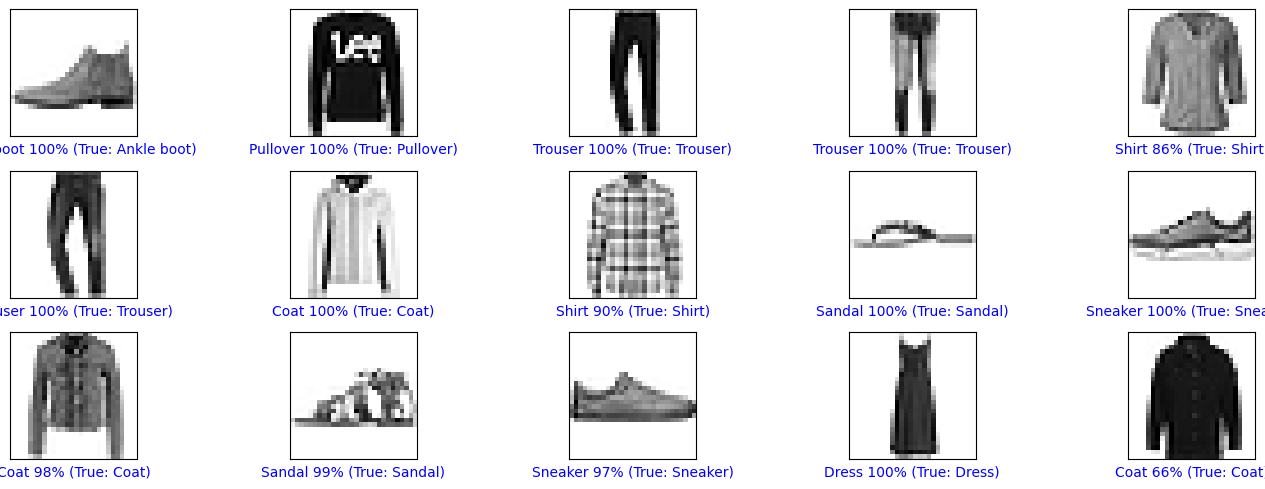

In [8]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i].reshape(28,28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% (True: {})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]),
        color=color)

# Plot the first 15 test images, their predicted labels, and the true labels
plt.figure(figsize=(15,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()